In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Figures parameters
import matplotlib.font_manager
from matplotlib.ticker import AutoMinorLocator
%matplotlib notebook

fontsize_axis = 22
fontsize_legend = 18
fontsize_ticks = 16
fontsize_text = 18
tick_major_length = 10
tick_minor_length = 6
markersize = 8
sizex, sizey = (9, 8)
dpi_fig = 80
frame_legend=False
fontname={'fontname': 'Arial'}

def Plot_format(fig, ax, legend=True):
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(direction='in',
               length=tick_major_length,
               width=1,
               colors='k',
               grid_color='k',
               grid_alpha=0.5,
               right=True,
               top=True)
    ax.tick_params(axis='x',
               which='minor',
               direction='in',
               length=tick_minor_length,
               top=True)
    ax.tick_params(axis='y',
               which='minor',
               direction='in',
               length=tick_minor_length,
               right=True)
    plt.rc('xtick', labelsize=fontsize_ticks) 
    plt.rc('ytick', labelsize=fontsize_ticks)
    plt.rc('mathtext', fontset='stixsans')
    if(legend):
        plt.legend(fontsize=fontsize_legend, loc=0,frameon=frame_legend); 

In [3]:
phi = np.logspace(np.log10(1e-04), np.log10(15))/100
f_prat = 1+(2.5/(1-phi)) * np.power(-np.log10(phi),-2.7)
f_cur = 1+np.sqrt(24*phi)+24*phi*(1-2/np.pi)
f_tret = (1+12*phi+np.sqrt(24*phi*(1+6*phi)))#/1.0734

<IPython.core.display.Javascript object>


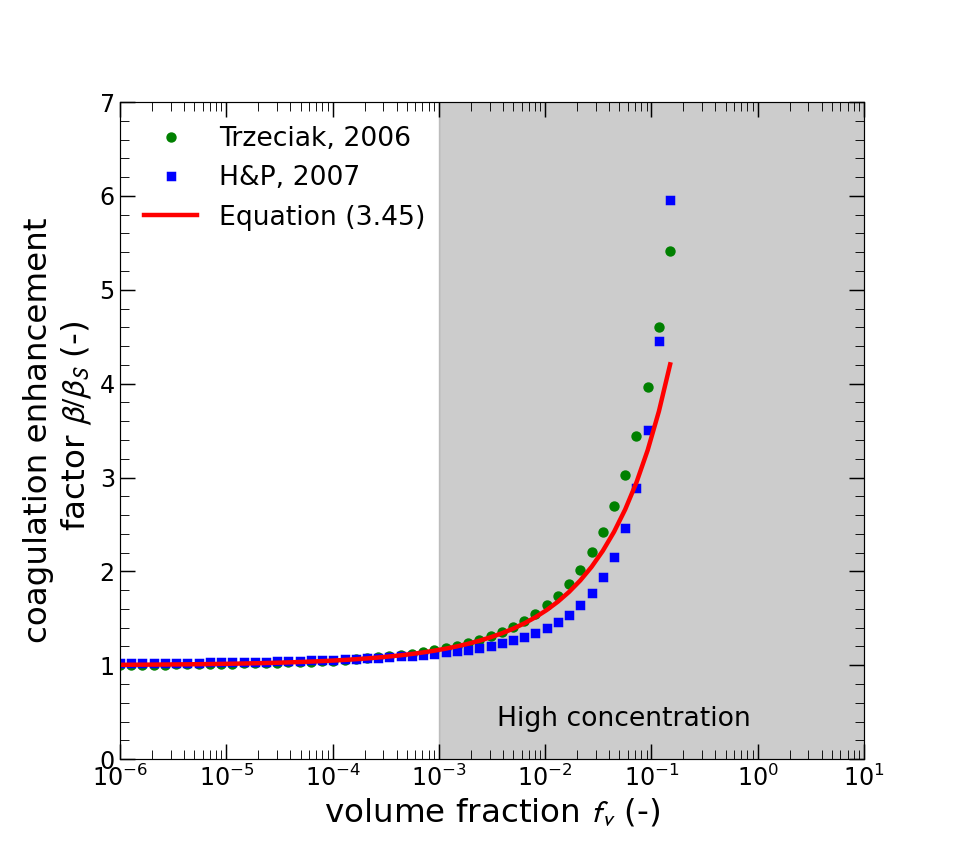

In [20]:
fig, ax = plt.subplots(num=None, figsize=(sizex, sizey), dpi=dpi_fig, facecolor='w', edgecolor='k')

plt.rc('xtick', labelsize=fontsize_legend) 
plt.rc('ytick', labelsize=fontsize_legend)

plt.plot(phi, f_tret, "o g",label="Trzeciak, 2006")
plt.plot(phi, f_prat, "s b",label="H&P, 2007")
plt.plot(phi, f_cur, "-r",linewidth=3,label="Equation (3.45)")

x = [1e-03, 1e+02]
y1 = [-8, -8]
y2 = [8, 8]
ax.fill_between(x, y1, y2, alpha=0.4, color='gray')

plt.xlabel('volume fraction $f_v$ (-)', fontsize=fontsize_axis)
plt.ylabel('coagulation enhancement\n factor $β/β_S$ (-)', fontsize=fontsize_axis)

Plot_format(fig, ax, legend=True)
plt.xscale("log")

y_min = 0
y_max = 7
x_min = 1e-06
x_max = 10
plt.ylim([y_min,y_max])
plt.xlim([x_min,x_max])
ax.text(np.exp(0.05*(np.log10(x_max)-np.log10(x_min))+np.log10(x_min)),
        0.05*(y_max-y_min)+y_min,
        "High concentration",
         color="k", fontsize=fontsize_legend)
#ax.set_yscale("log");
#ax.set_xscale("log");

plt.savefig('Figures/kernels_high_conc.png');